# Lecture 2.3: Data Visualization

This lecture, we are going to do basic data visualization with [matplotlib](https://matplotlib.org/).

**Learning goals:**

- differentiate between pandas & matplotlib plotting
- use the object-oriented api
- create a distribution bar chart
- manipulate plot formatting
- create a violin plot

## More Pokemon

Professor Oak has given us a mission. He would like us to explore the pokedex to find the best type of pokemon. He isn't very clear about what _best_ means though... He's confident about the fact that a pokemon with higher `Total` stat is better, but he's not sure what that means for an entire `Type 1`. The highest average `Total`? The max value? Since this is broad question, it requires a broad answer: we decide to provide him with _insights_ into the "goodness" of pokemon types.

Let's revisit the dataset used for homework 1:


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pokemons.csv')
df.head()

/Users/amine/.local/share/virtualenvs/practical-data-scientist-umj5maBJ-python/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Let's find out which `Type 1` are the most popular:

In [2]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

The values are quite varied! It's hard to compare them. We are still in the data _exploration_ phase, but we can still use plots to our advantage: let's visualize these values in a [horizontal bar chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.barh.html):

<AxesSubplot:>

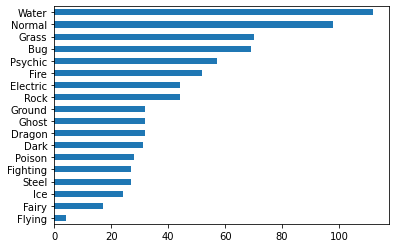

In [6]:
df['Type 1'].value_counts()[::-1].plot.barh()

Much easier to compare the values! The horinzontal alignment of the bars allow our brains to do the "fast math" unconsciously 🚀

Now that we've explored the pokemon types, we decide that we want to _communicate_ to Professor Oak the `Total` distribution of the most common type: `Water`. Since this isn't exploration anymore, let's do things properly and use matplotlib! But first, let's select the rows for which `Type 1 == Water`:

In [7]:
def get_type(df, type_name):
    return df[df['Type 1'] == type_name]

water_df = get_type(df, 'Water')

The pandas `plot` api actually uses matplotlib in the back, wrapped directly as a `Dataframe` method for convenience. But using matplotlib directly will give us more control over the graph. To do so, let's import matplotlib as `plt`. Again, this is a convention, so please follow it! 🙇‍♂️

In [8]:
import matplotlib.pyplot as plt

matplotlib has two parallel apis that lead to the same results. We'll chose the [object-oriented api](https://matplotlib.org/3.1.3/api/index.html#the-object-oriented-api) because we are not savages. First, we need to create a [figure](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html) object. This `fig` represents the canvas we are using to plot our graph. Then we add a `subplot` to this canvas. The method returns an [`axes`](https://matplotlib.org/api/axes_api.html) object which is the key to all of matplotlib's methods and functionality. For example, it allows us to then directly call the [`.hist()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist) method to plot our `Water` types distribution:

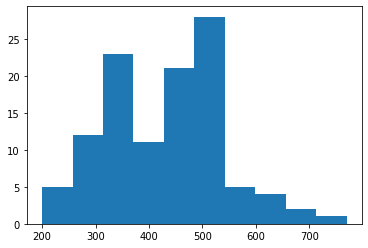

In [9]:
# make canvas
fig = plt.figure()
# add subplot
ax = fig.add_subplot(111)
# plot histogram
ax.hist(water_df['Total']);

Now this graph isn't much prettier than if we ran it straight through pandas... Let's use matplotlib's formatting features to liven it up a little:

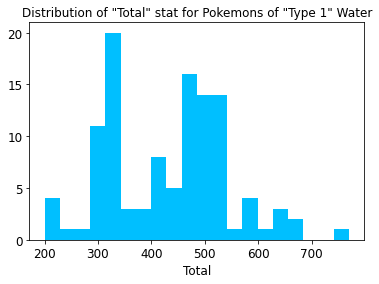

In [10]:
import matplotlib.ticker as ticker

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(water_df['Total'], bins=20, color='deepskyblue')
ax.set_title('Distribution of "Total" stat for Pokemons of "Type 1" Water')
ax.set_xlabel("Total", size=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

That's a little bit better! At least we now have a title and labels, so that the graph is understandable to someone unfamiliar with our task. Notice how reducing the bin size was important to reveal the smaller scale patterns in the distribution. Displaying the larger size was misleading, and for example hid the outlier with `Total > 700` 🐋.

🧠 Can you think of other things we could improve about this graph? Revisit the lecture slides if you have doubts.

Professor Oak is interested by the water distribution. But now, he wonders how it compares to other types. But that's a lot of histograms! How can we combine them or juxtapose them? Let's use the data to viz [website](https://www.data-to-viz.com/) to help us choose a graph type. Under "several numeric" & "not ordered" data, we can find box plots. That would be a way to compare the `Total` distribution of types, but remember from the slides that it's always better to show full distributions rather than error bars. So instead, let's make a violin plot 🎻

In [11]:
types = ['Water', 'Normal', 'Grass']
dfs = [get_type(df, t) for t in types]
arrays = [d['Total'].values for d in dfs]
    

In [12]:
arrays

[array([314, 405, 530, 630, 320, 500, 300, 385, 510, 335, 515, 315, 490,
        590, 325, 475, 305, 525, 325, 475, 295, 440, 320, 450, 340, 520,
        200, 540, 640, 535, 525, 314, 405, 530, 330, 460, 250, 420, 500,
        210, 430, 490, 430, 380, 300, 480, 465, 540, 580, 310, 405, 535,
        635, 220, 340, 480, 270, 430, 305, 460, 560, 400, 500, 288, 468,
        308, 468, 200, 540, 345, 485, 485, 485, 330, 670, 770, 314, 405,
        530, 330, 495, 325, 475, 330, 460, 345, 680, 480, 600, 308, 413,
        528, 316, 498, 294, 384, 509, 460, 355, 495, 305, 473, 335, 480,
        470, 580, 580, 314, 405, 530, 330, 500]),
 array([251, 349, 479, 579, 253, 413, 262, 442, 270, 435, 290, 440, 352,
        310, 460, 385, 450, 490, 590, 490, 288, 325, 395, 540, 215, 415,
        262, 442, 210, 360, 455, 415, 330, 500, 515, 465, 250, 490, 540,
        240, 420, 270, 430, 280, 440, 670, 240, 360, 490, 190, 260, 380,
        360, 310, 458, 420, 440, 245, 340, 485, 250, 410, 482, 350, 480,
 

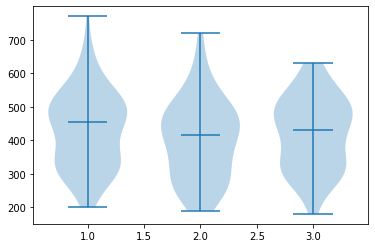

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.violinplot(arrays, [1, 2, 3], points=60, widths=0.7, showmeans=False,
                      showextrema=True, showmedians=True, bw_method=0.5);

🧠 Can you think of any other interesting graph types that can used for the pokemon dataset?
Pro-tip: use this [blog](https://www.data-to-viz.com/) to get ideas

There are some strong water pokemons... but they are also the most popular type. Let's investigate how the most popular pokemon types changed through the generations.

💪💪 Plot a [stacked bar chart](https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/bar_stacked.html). As x axis, use the `Generation`, and split the bars into the 4 most popular `Type 1`s. The bar lengths should represent the counts of pokemons of that `Type 1` for that `Generation`.
Pro-tip: read the api carefully, and don't hesitate to google some details! Matplotlib is notorious for being the subject of many stackoverflow posts...

In [ ]:
# TODO generation on X axes and for each the type

There are [_many_](https://github.com/fasouto/awesome-dataviz#python-tools) python plotting libraries that we have not covered during this lecture. You will have the chance to explore them and decide which you prefer. But here's a little trick in the meantime: [seaborn](https://seaborn.pydata.org/) is built on top of matplotlib, and makes it trivial to spice up our graphs:

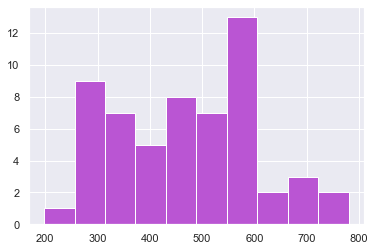

In [14]:
import seaborn as sb
sb.set()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(get_type(df, 'Psychic')['Total'], color='mediumorchid');

Just `import seaborn` and `sb.set()` and we're good to go! The library also has its own api, you can see some example [here](https://seaborn.pydata.org/examples/index.html).

In [ ]:
# Also there is another library
# Streamlit that add some interaction for the user to test his plot

## Summary

Today was our introduction to **data visualization**. We learned the difference between **data literacy** and **visual literacy**, and why those are so important to data science. We learned tricks and good practices to improve our **data story-telling**. For example, we now know that **minimalism** in graph design makes for clear and concise plots. We also saw how **colors**, **text**, and **conventions** all matter to convey information effectively. We identified how visualization can be used for both data **exploration** and **communication**, and highlighted the workflow differences between the two. Finally, we revisited our pokemon trainer ambitions and compared distributions with customized **violin plots** in **matplotlib**.

This concludes our section on data exploration! 🎊Next week, we start data analysis with a lesson on clustering.


# Resources


### Core Resources

- [matplotlib tutorial](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)  
A jupyter notebook introduction to matplotlib
- [Data visualization methods in python](https://machinelearningmastery.com/data-visualization-methods-in-python/)   
Breakdown of common matplotlib graphs
- [Dataviz blog](https://www.data-to-viz.com)  
Excellent portal of useful data viz resources, including a decision tree to choose graphs, and a list of typical graph caveats

### Additional Resources

- [The python graph gallery](https://python-graph-gallery.com/)  
Example of many beautiful python graphs
- [Data science cheat sheet - data visualization](https://github.com/abhat222/Data-Science--Cheat-Sheet/tree/master/Data%20Visualization)  
List of resources for data visualization
- [Analytics storytelling for impact](https://www.edx.org/course/analytics-storytelling-for-impact-2)  
Free course to craft data analytics communication with storytelling
- [The best stats you've ever seen](https://youtu.be/usdJgEwMinM)  
Classic TED talk from one of the greats of data visualization, Hans Rosling
- [visualisingdata](https://www.visualisingdata.com/)  
Great blog/portal for all things visualisation, including a monthly digest of the best data viz on the web
- [Color theory dos and donts for data visualization](https://infogram.com/blog/color-theory-dos-and-donts-for-data-visualization/)  
Guidelines for choosing colors for your graphs
- [Data looks better naked](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)  
Source of "data minimalism" gif in the slides
- [Python data visualization demos](https://www.kaggle.com/benhamner/python-data-visualizations)  
Great examples of matplotlib graphs on the iris dataset
- [Analysis of OK Cupid dataset with matplotlib](https://nbviewer.jupyter.org/github/lalelale/profiles_analysis/blob/master/profiles.ipynb)  
Great examples of matplotlib graphs on an OK Cupid dataset
- [The visual display of quantitative information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142/ref=as_li_ss_tl?ie=UTF8&qid=1521082239&sr=8-16&keywords=data+visualization&linkCode=sl1&tag=inspiredalgor-20&linkId=cd8082f9213b87a44ec7207ba162d89a)  
The holy book of Data Visualization, beautiful and captivating
- [Big data visualization](https://youtu.be/WWKxzjKzN3A)  
Siraj on data viz
- [WTF visualizations](https://viz.wtf/)  
Examples of what _not_ to do with your graphs
- [How to choose the correct visualization tool](https://source.opennews.org/articles/what-i-learned-recreating-one-chart-using-24-tools/)  
Comparison of 24 plotting frameworks